# Understand the type of data <br>contained in ieee8023 covid chest-x-ray data set

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import data
metadata_dir = '../data/metadata.csv'
metadata = pd.read_csv(metadata_dir)
# what info do we have?
print(metadata.columns)

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'RT_PCR_positive',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29'],
      dtype='object')


In [8]:
metadata.sample(8)

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
26,13,9.0,M,35.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 24, 2020","Snohomish County, Washington, United States",images,nejmoa2001191_f4.jpeg,10.1056/NEJMoa2001191,https://www.nejm.org/doi/full/10.1056/NEJMoa20...,NaN,"On January 19, 2020, a 35-year-old man present...",NaN,NaN
132,68,19.0,NaN,NaN,Pneumonia/Viral/COVID-19,Y,Y,NaN,NaN,NaN,...,"Feb 21, 2020",Taiwan,images,1-s2.0-S1684118220300682-main.pdf-003-b2.png,10.1016/j.jmii.2020.03.008,https://www.sciencedirect.com/science/article/...,CC BY-NC-ND,Left lower lung interstitial infiltrates were ...,NaN,NaN
809,423a,0.0,NaN,NaN,Pneumonia/Viral/MERS-CoV,NaN,NaN,NaN,NaN,NaN,...,NaN,"Alexandria, Egypt",images,MERS-CoV-1-s2.0-S0378603X1500248X-gr4e.jpg,10.1016/j.ejrnm.2015.11.004,https://www.sciencedirect.com/science/article/...,CC BY-NC-ND 4.0,Fig. 1a. A case of MERS-CoV,Chest X-ray,frontal projection at day of presentation sho...
352,198,2.0,F,74.0,Pneumonia/Viral/COVID-19,Y,NaN,NaN,NaN,Y,...,NaN,"Complejo Hospitalario de Navarra, Pamplona, Spain",images,16708_4_1.jpg,NaN,https://www.eurorad.org/case/16708,CC BY-NC-SA 4.0,A 74-year-old woman with history of hypertensi...,NaN,NaN
118,61,NaN,M,38.0,Pneumonia/Viral/COVID-19,Y,NaN,NaN,NaN,NaN,...,2020,China,images,ciaa199.pdf-001-b.png,10.1093/cid/ciaa199,https://academic.oup.com/cid/advance-article/d...,NaN,Chest x-ray images and chest CT images from a ...,NaN,NaN
925,468,NaN,F,50.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,...,NaN,"Adelaide, Australia",images,e0e3a6526a3fecadfca2be13242798_jumbo.jpg,NaN,https://radiopaedia.org/cases/left-lower-lobe-...,CC BY-NC-SA,"Shortness of breath, fever and rigors Opacity ...","Case courtesy of Dr Thuan Tzen, Koh, Radiopaed...",NaN
222,117,4.0,M,50.0,Pneumonia/Viral/COVID-19,Unclear,NaN,NaN,NaN,NaN,...,2020,Spain,images,covid-19-pneumonia-evolution-over-a-week-1-day...,NaN,https://radiopaedia.org/cases/covid-19-pneumon...,CC BY-NC-SA,"Radiological worsening, with consolidation in ...","Case courtesy of Dr Edgar Lorente, Radiopaedia...",NaN
21,12,7.0,M,42.0,Pneumonia/Viral/COVID-19,Y,Y,NaN,NaN,NaN,...,"January 1, 2020","Tongji Medical College, Wuhan, Hubei Province,...",images,nCoV-radiol.2020200269.fig1-day7.jpeg,10.1148/radiol.2020200269,https://pubs.rsna.org/doi/10.1148/radiol.20202...,NaN,"On January 1, 2020, a 42-year-old man was admi...",NaN,NaN


## Plot some readily available values ( ***nan*** where data is unknown)

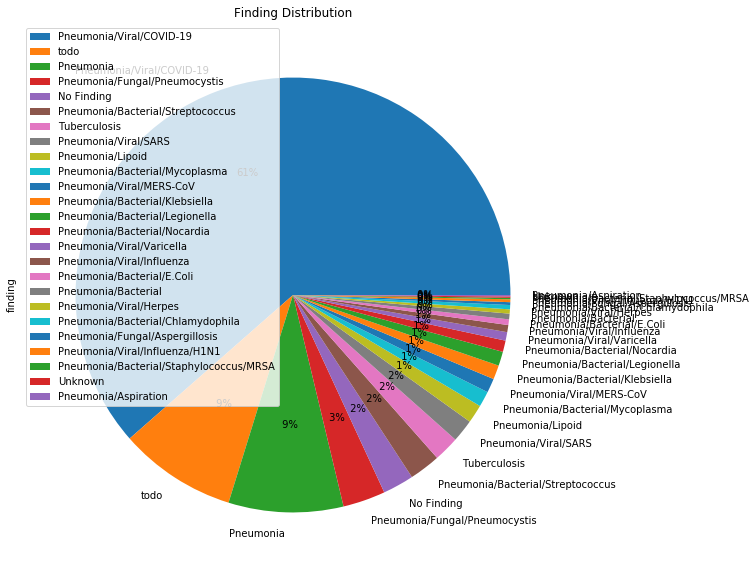

In [9]:
# Finding distribution (nan if unknown)
ax = metadata['finding'].value_counts(dropna=False).plot.pie(y='Finding', legend = True, autopct='%2.0f%%', figsize = (10,10), title = 'Finding Distribution')

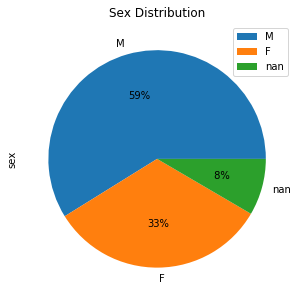

In [10]:
# Sex distribution (nan if unknown)
ax = metadata['sex'].value_counts(dropna=False).plot.pie(y='sex', legend = True, autopct='%2.0f%%', figsize = (5,5), title = 'Sex Distribution')

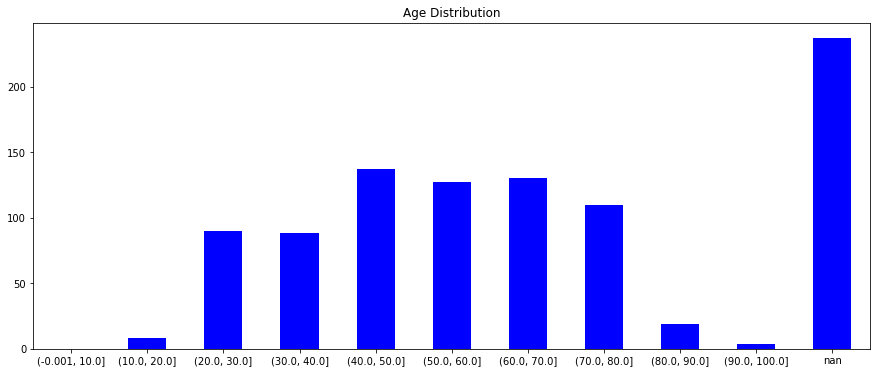

In [11]:
# Age distribution of patients (nan is unknown)
out = pd.cut(metadata['age'], bins=np.arange(0,110,10).tolist(), include_lowest=True)
ax = out.value_counts(sort=False, dropna=False).plot.bar(rot=0, color="b", figsize=(15,6), title= "Age Distribution")
plt.show()

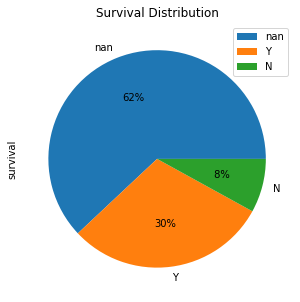

In [12]:
# Survival distribution of all patients
ax = metadata['survival'].value_counts(dropna=False).plot.pie(y='survival', legend = True, autopct='%2.0f%%', figsize = (5,5), title = 'Survival Distribution')

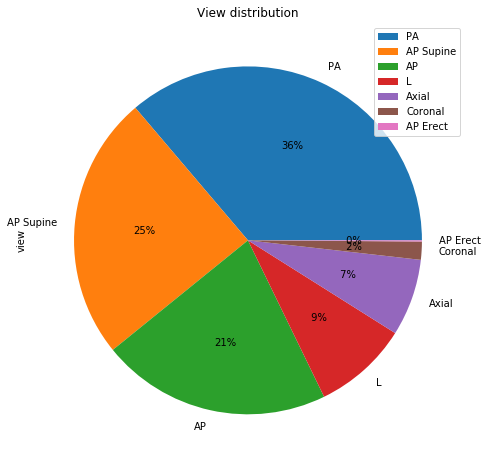

In [13]:
# X-ray view distribution, to identify usefull image data among whole data set (PA, AP & AP Supine)
ax = metadata['view'].value_counts(dropna=False).plot.pie(y='view', legend = True, autopct='%2.0f%%', figsize = (8,8), title = 'View distribution')

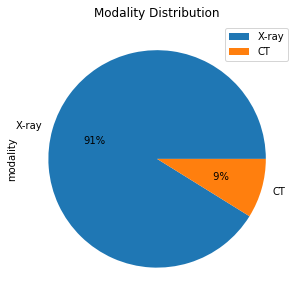

In [14]:
# Modality
ax = metadata['modality'].value_counts(dropna=False).plot.pie(y='modality', legend = True, autopct='%2.0f%%', figsize = (5,5), title = 'Modality Distribution')

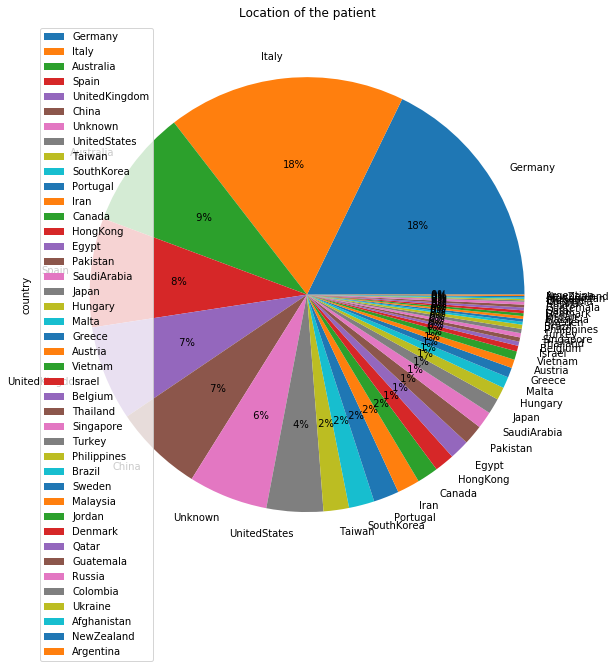

In [15]:
# Location
metadata['country'] = metadata['location'].apply(lambda x: x.split(',')[-1].replace(" ","") if x is not np.nan else "Unknown")
ax = metadata['country'].value_counts(dropna=False).plot.pie(y='country', legend = True, autopct='%2.0f%%', figsize = (10,10), title = 'Location of the patient')